# Quantum Harmonic Oscillator: Ladder Operators

## Introduction

The quantum harmonic oscillator is one of the most fundamental systems in quantum mechanics. It serves as a paradigm for understanding vibrational modes in molecules, phonons in solids, and the quantization of electromagnetic fields. In this notebook, we explore the elegant algebraic approach to solving the quantum harmonic oscillator using **ladder operators** (also known as creation and annihilation operators).

## The Classical Harmonic Oscillator

The classical harmonic oscillator has the Hamiltonian:

$$H = \frac{p^2}{2m} + \frac{1}{2}m\omega^2 x^2$$

where $m$ is the mass, $\omega$ is the angular frequency, $x$ is position, and $p$ is momentum.

## Quantum Mechanical Formulation

In quantum mechanics, we promote $x$ and $p$ to operators satisfying the canonical commutation relation:

$$[\hat{x}, \hat{p}] = i\hbar$$

The quantum Hamiltonian becomes:

$$\hat{H} = \frac{\hat{p}^2}{2m} + \frac{1}{2}m\omega^2 \hat{x}^2$$

## Ladder Operators: Definition

We define the **annihilation operator** $\hat{a}$ and **creation operator** $\hat{a}^\dagger$ as:

$$\hat{a} = \sqrt{\frac{m\omega}{2\hbar}}\left(\hat{x} + \frac{i\hat{p}}{m\omega}\right)$$

$$\hat{a}^\dagger = \sqrt{\frac{m\omega}{2\hbar}}\left(\hat{x} - \frac{i\hat{p}}{m\omega}\right)$$

### Key Commutation Relation

These operators satisfy:

$$[\hat{a}, \hat{a}^\dagger] = 1$$

### Hamiltonian in Terms of Ladder Operators

The Hamiltonian can be elegantly rewritten as:

$$\hat{H} = \hbar\omega\left(\hat{a}^\dagger\hat{a} + \frac{1}{2}\right) = \hbar\omega\left(\hat{N} + \frac{1}{2}\right)$$

where $\hat{N} = \hat{a}^\dagger\hat{a}$ is the **number operator**.

## Energy Eigenvalues and Eigenstates

The energy eigenvalues are:

$$E_n = \hbar\omega\left(n + \frac{1}{2}\right), \quad n = 0, 1, 2, \ldots$$

The corresponding eigenstates $|n\rangle$ (Fock states) satisfy:

$$\hat{N}|n\rangle = n|n\rangle$$

### Action of Ladder Operators on Fock States

The ladder operators raise and lower the quantum number:

$$\hat{a}|n\rangle = \sqrt{n}|n-1\rangle$$

$$\hat{a}^\dagger|n\rangle = \sqrt{n+1}|n+1\rangle$$

The ground state $|0\rangle$ satisfies $\hat{a}|0\rangle = 0$, and excited states are generated by:

$$|n\rangle = \frac{(\hat{a}^\dagger)^n}{\sqrt{n!}}|0\rangle$$

## Position-Space Wavefunctions

The normalized wavefunctions in position space are:

$$\psi_n(x) = \left(\frac{m\omega}{\pi\hbar}\right)^{1/4} \frac{1}{\sqrt{2^n n!}} H_n\left(\sqrt{\frac{m\omega}{\hbar}}x\right) e^{-\frac{m\omega x^2}{2\hbar}}$$

where $H_n(\xi)$ are the Hermite polynomials.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from scipy.linalg import eigh
from math import factorial, sqrt

# Set natural units: hbar = m = omega = 1
hbar = 1.0
m = 1.0
omega = 1.0

print("Quantum Harmonic Oscillator - Ladder Operator Analysis")
print("=" * 55)
print(f"Using natural units: ℏ = {hbar}, m = {m}, ω = {omega}")

Quantum Harmonic Oscillator - Ladder Operator Analysis
Using natural units: ℏ = 1.0, m = 1.0, ω = 1.0


## Matrix Representation of Ladder Operators

In a truncated Fock basis $\{|0\rangle, |1\rangle, \ldots, |N-1\rangle\}$, the ladder operators have matrix representations:

$$\langle m|\hat{a}|n\rangle = \sqrt{n}\,\delta_{m,n-1}$$

$$\langle m|\hat{a}^\dagger|n\rangle = \sqrt{n+1}\,\delta_{m,n+1}$$

In [2]:
def create_ladder_operators(N):
    """
    Create matrix representations of ladder operators in truncated Fock space.
    
    Parameters:
    -----------
    N : int
        Dimension of the truncated Hilbert space
        
    Returns:
    --------
    a : ndarray
        Annihilation operator matrix
    a_dag : ndarray
        Creation operator matrix
    """
    # Annihilation operator: a|n> = sqrt(n)|n-1>
    a = np.zeros((N, N), dtype=complex)
    for n in range(1, N):
        a[n-1, n] = np.sqrt(n)
    
    # Creation operator is the adjoint
    a_dag = a.conj().T
    
    return a, a_dag

# Create operators in a 10-dimensional Fock space
N_dim = 10
a, a_dag = create_ladder_operators(N_dim)

print("Annihilation operator â (first 6×6 block):")
print(np.real(a[:6, :6]))
print("\nCreation operator â† (first 6×6 block):")
print(np.real(a_dag[:6, :6]))

Annihilation operator â (first 6×6 block):
[[0.         1.         0.         0.         0.         0.        ]
 [0.         0.         1.41421356 0.         0.         0.        ]
 [0.         0.         0.         1.73205081 0.         0.        ]
 [0.         0.         0.         0.         2.         0.        ]
 [0.         0.         0.         0.         0.         2.23606798]
 [0.         0.         0.         0.         0.         0.        ]]

Creation operator â† (first 6×6 block):
[[0.         0.         0.         0.         0.         0.        ]
 [1.         0.         0.         0.         0.         0.        ]
 [0.         1.41421356 0.         0.         0.         0.        ]
 [0.         0.         1.73205081 0.         0.         0.        ]
 [0.         0.         0.         2.         0.         0.        ]
 [0.         0.         0.         0.         2.23606798 0.        ]]


## Verification of Commutation Relations

Let us verify that $[\hat{a}, \hat{a}^\dagger] = \mathbb{1}$ holds in our matrix representation.

In [3]:
# Compute the commutator [a, a†] = a·a† - a†·a
commutator = a @ a_dag - a_dag @ a

print("Commutator [â, â†]:")
print(np.real(commutator[:6, :6]))
print(f"\nMaximum deviation from identity: {np.max(np.abs(commutator - np.eye(N_dim))):.2e}")

# Note: There's a boundary effect at the last diagonal element due to truncation
print(f"\n(Note: Truncation causes deviation at boundary, element [{N_dim-1},{N_dim-1}])")

Commutator [â, â†]:
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]]

Maximum deviation from identity: 1.00e+01

(Note: Truncation causes deviation at boundary, element [9,9])


## Number Operator and Hamiltonian

We construct the number operator $\hat{N} = \hat{a}^\dagger\hat{a}$ and the Hamiltonian.

In [4]:
# Number operator N = a†a
N_op = a_dag @ a

# Hamiltonian H = ℏω(N + 1/2)
H = hbar * omega * (N_op + 0.5 * np.eye(N_dim))

print("Number operator N̂ = â†â (diagonal elements):")
print(np.diag(np.real(N_op)))

print("\nHamiltonian eigenvalues (Eₙ = ℏω(n + 1/2)):")
eigenvalues = np.diag(np.real(H))
for n, E in enumerate(eigenvalues):
    print(f"  E_{n} = {E:.1f}ℏω")

Number operator N̂ = â†â (diagonal elements):
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]

Hamiltonian eigenvalues (Eₙ = ℏω(n + 1/2)):
  E_0 = 0.5ℏω
  E_1 = 1.5ℏω
  E_2 = 2.5ℏω
  E_3 = 3.5ℏω
  E_4 = 4.5ℏω
  E_5 = 5.5ℏω
  E_6 = 6.5ℏω
  E_7 = 7.5ℏω
  E_8 = 8.5ℏω
  E_9 = 9.5ℏω


## Position and Momentum Operators

We can express position and momentum in terms of ladder operators:

$$\hat{x} = \sqrt{\frac{\hbar}{2m\omega}}(\hat{a} + \hat{a}^\dagger)$$

$$\hat{p} = i\sqrt{\frac{m\hbar\omega}{2}}(\hat{a}^\dagger - \hat{a})$$

In [5]:
# Position operator
x_coeff = np.sqrt(hbar / (2 * m * omega))
x_op = x_coeff * (a + a_dag)

# Momentum operator
p_coeff = 1j * np.sqrt(m * hbar * omega / 2)
p_op = p_coeff * (a_dag - a)

# Verify canonical commutation relation [x, p] = iℏ
xp_commutator = x_op @ p_op - p_op @ x_op

print("Position operator x̂ (first 6×6 block):")
print(np.real(x_op[:6, :6]).round(4))

print("\nMomentum operator p̂ (first 6×6 block, imaginary part):")
print(np.imag(p_op[:6, :6]).round(4))

print(f"\n[x̂, p̂] diagonal elements (should be iℏ = i):")
print(np.diag(xp_commutator[:6, :6]).round(4))

Position operator x̂ (first 6×6 block):
[[0.     0.7071 0.     0.     0.     0.    ]
 [0.7071 0.     1.     0.     0.     0.    ]
 [0.     1.     0.     1.2247 0.     0.    ]
 [0.     0.     1.2247 0.     1.4142 0.    ]
 [0.     0.     0.     1.4142 0.     1.5811]
 [0.     0.     0.     0.     1.5811 0.    ]]

Momentum operator p̂ (first 6×6 block, imaginary part):
[[ 0.     -0.7071  0.      0.      0.      0.    ]
 [ 0.7071  0.     -1.      0.      0.      0.    ]
 [ 0.      1.      0.     -1.2247  0.      0.    ]
 [ 0.      0.      1.2247  0.     -1.4142  0.    ]
 [ 0.      0.      0.      1.4142  0.     -1.5811]
 [ 0.      0.      0.      0.      1.5811  0.    ]]

[x̂, p̂] diagonal elements (should be iℏ = i):
[0.+1.j 0.+1.j 0.+1.j 0.+1.j 0.+1.j 0.+1.j]


## Expectation Values and Uncertainty Relations

For the $n$-th energy eigenstate:

$$\langle n|\hat{x}|n\rangle = 0, \quad \langle n|\hat{p}|n\rangle = 0$$

$$\langle n|\hat{x}^2|n\rangle = \frac{\hbar}{m\omega}\left(n + \frac{1}{2}\right)$$

$$\langle n|\hat{p}^2|n\rangle = m\hbar\omega\left(n + \frac{1}{2}\right)$$

This gives the uncertainty product:

$$\Delta x \cdot \Delta p = \hbar\left(n + \frac{1}{2}\right) \geq \frac{\hbar}{2}$$

The ground state $|0\rangle$ saturates the Heisenberg uncertainty bound.

In [6]:
# Compute expectation values for each Fock state
x2_op = x_op @ x_op
p2_op = p_op @ p_op

print("Expectation values and uncertainties for Fock states |n⟩:")
print("=" * 60)
print(f"{'n':<4} {'⟨x⟩':<10} {'⟨p⟩':<10} {'Δx':<12} {'Δp':<12} {'Δx·Δp':<10}")
print("-" * 60)

for n in range(6):
    # Create Fock state |n⟩
    state = np.zeros(N_dim, dtype=complex)
    state[n] = 1.0
    
    # Expectation values
    exp_x = np.real(state.conj() @ x_op @ state)
    exp_p = np.real(state.conj() @ p_op @ state)
    exp_x2 = np.real(state.conj() @ x2_op @ state)
    exp_p2 = np.real(state.conj() @ p2_op @ state)
    
    # Uncertainties
    delta_x = np.sqrt(exp_x2 - exp_x**2)
    delta_p = np.sqrt(exp_p2 - exp_p**2)
    uncertainty_product = delta_x * delta_p
    
    print(f"{n:<4} {exp_x:<10.4f} {exp_p:<10.4f} {delta_x:<12.4f} {delta_p:<12.4f} {uncertainty_product:<10.4f}")

print("-" * 60)
print(f"Heisenberg bound: Δx·Δp ≥ ℏ/2 = {hbar/2:.4f}")

Expectation values and uncertainties for Fock states |n⟩:
n    ⟨x⟩        ⟨p⟩        Δx           Δp           Δx·Δp     
------------------------------------------------------------
0    0.0000     0.0000     0.7071       0.7071       0.5000    
1    0.0000     0.0000     1.2247       1.2247       1.5000    
2    0.0000     0.0000     1.5811       1.5811       2.5000    
3    0.0000     0.0000     1.8708       1.8708       3.5000    
4    0.0000     0.0000     2.1213       2.1213       4.5000    
5    0.0000     0.0000     2.3452       2.3452       5.5000    
------------------------------------------------------------
Heisenberg bound: Δx·Δp ≥ ℏ/2 = 0.5000


## Position-Space Wavefunctions

We now compute and visualize the position-space wavefunctions $\psi_n(x)$ using Hermite polynomials.

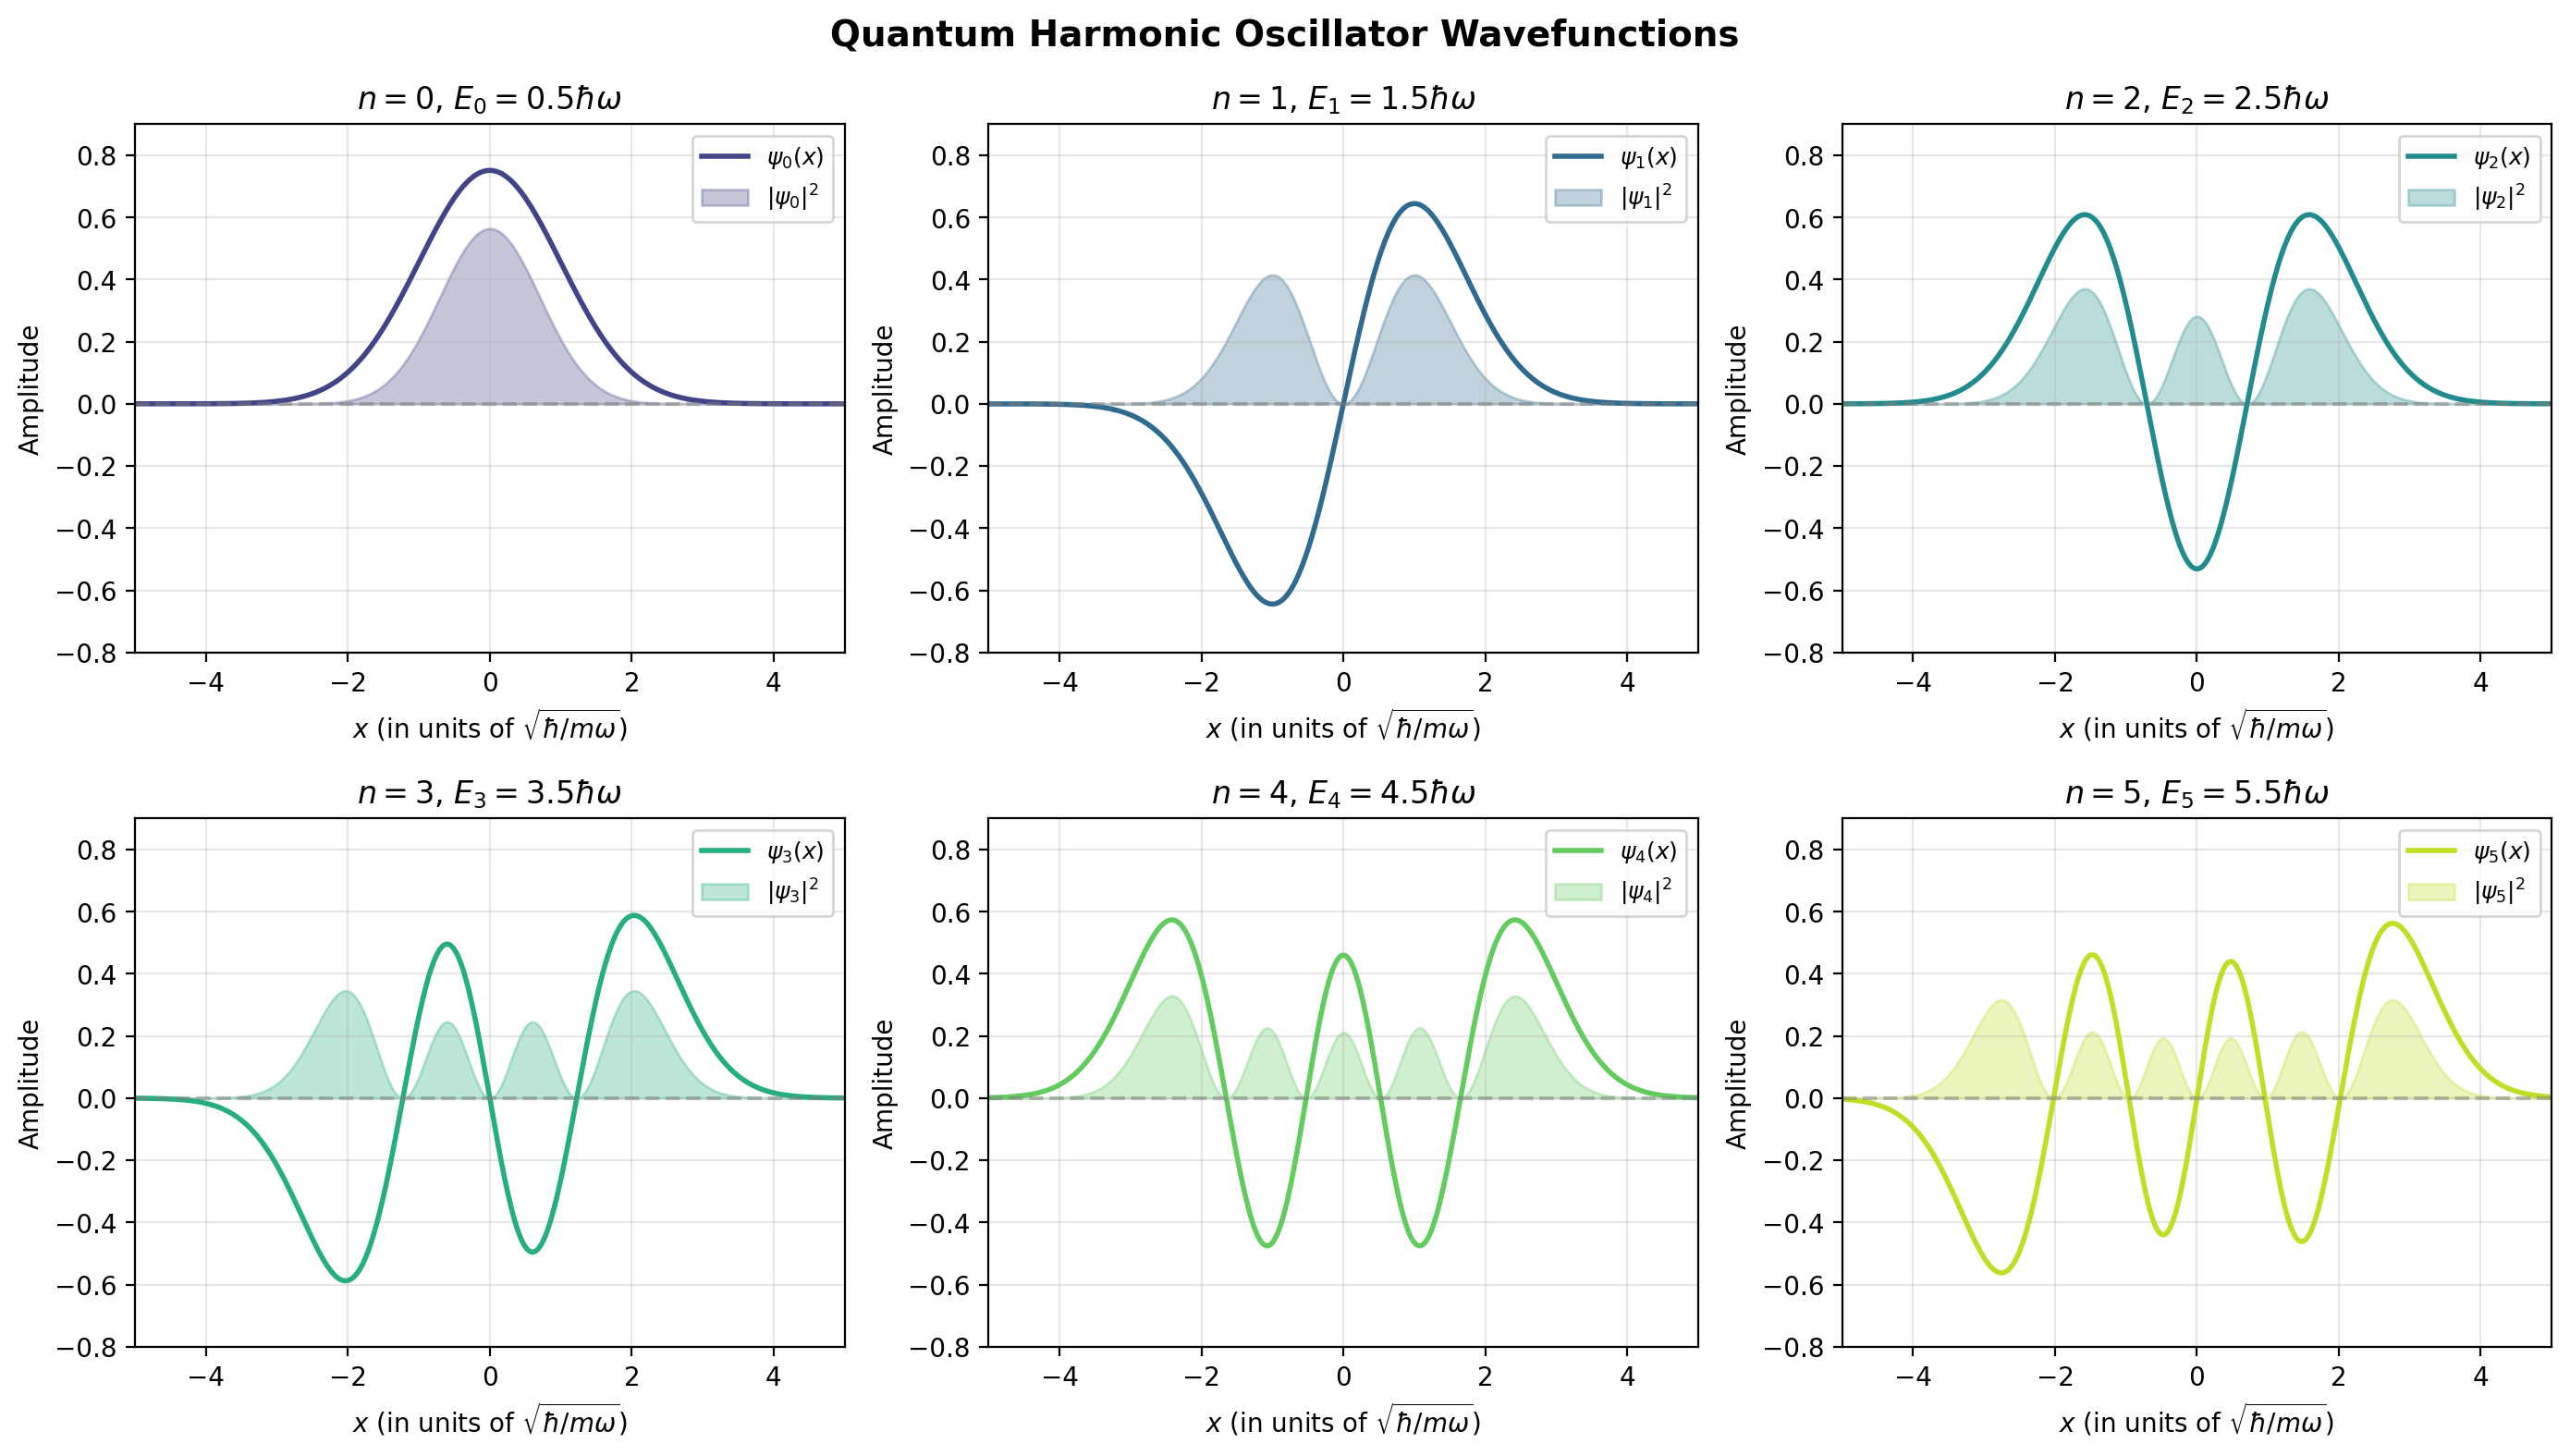

In [7]:
def harmonic_oscillator_wavefunction(n, x, m=1.0, omega=1.0, hbar=1.0):
    """
    Compute the n-th harmonic oscillator wavefunction.
    
    Parameters:
    -----------
    n : int
        Quantum number
    x : array-like
        Position values
    m, omega, hbar : float
        Physical parameters
        
    Returns:
    --------
    psi : ndarray
        Wavefunction values
    """
    # Characteristic length scale
    xi = np.sqrt(m * omega / hbar) * x
    
    # Normalization constant
    norm = (m * omega / (np.pi * hbar))**0.25 / np.sqrt(float(2**n * factorial(n)))
    
    # Hermite polynomial
    Hn = hermite(n)
    
    # Wavefunction
    psi = norm * Hn(xi) * np.exp(-xi**2 / 2)
    
    return psi

# Position grid
x = np.linspace(-6, 6, 500)

# Plot wavefunctions for n = 0, 1, 2, 3, 4, 5
fig, axes = plt.subplots(2, 3, figsize=(14, 8))
axes = axes.flatten()

colors = plt.cm.viridis(np.linspace(0.2, 0.9, 6))

for n in range(6):
    ax = axes[n]
    psi = harmonic_oscillator_wavefunction(n, x)
    psi_squared = np.abs(psi)**2
    
    # Plot wavefunction and probability density
    ax.plot(x, psi, color=colors[n], linewidth=2, label=r'$\psi_{' + str(n) + r'}(x)$')
    ax.fill_between(x, 0, psi_squared, alpha=0.3, color=colors[n], label=r'$|\psi_{' + str(n) + r'}|^2$')
    
    # Add energy level
    E_n = hbar * omega * (n + 0.5)
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    
    ax.set_xlim(-5, 5)
    ax.set_ylim(-0.8, 0.9)
    ax.set_xlabel(r'$x$ (in units of $\sqrt{\hbar/m\omega}$)', fontsize=10)
    ax.set_ylabel(r'Amplitude', fontsize=10)
    ax.set_title(f'$n = {n}$, $E_{n} = {E_n:.1f}\\hbar\\omega$', fontsize=12)
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(True, alpha=0.3)

plt.suptitle('Quantum Harmonic Oscillator Wavefunctions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('wavefunctions_individual.png', dpi=150, bbox_inches='tight')
plt.show()

## Ladder Operator Action: Raising and Lowering States

Let us visualize how the ladder operators transform wavefunctions.

Applying $\hat{a}^\dagger$ to $\psi_n$ gives $\sqrt{n+1}\,\psi_{n+1}$, while $\hat{a}$ gives $\sqrt{n}\,\psi_{n-1}$.

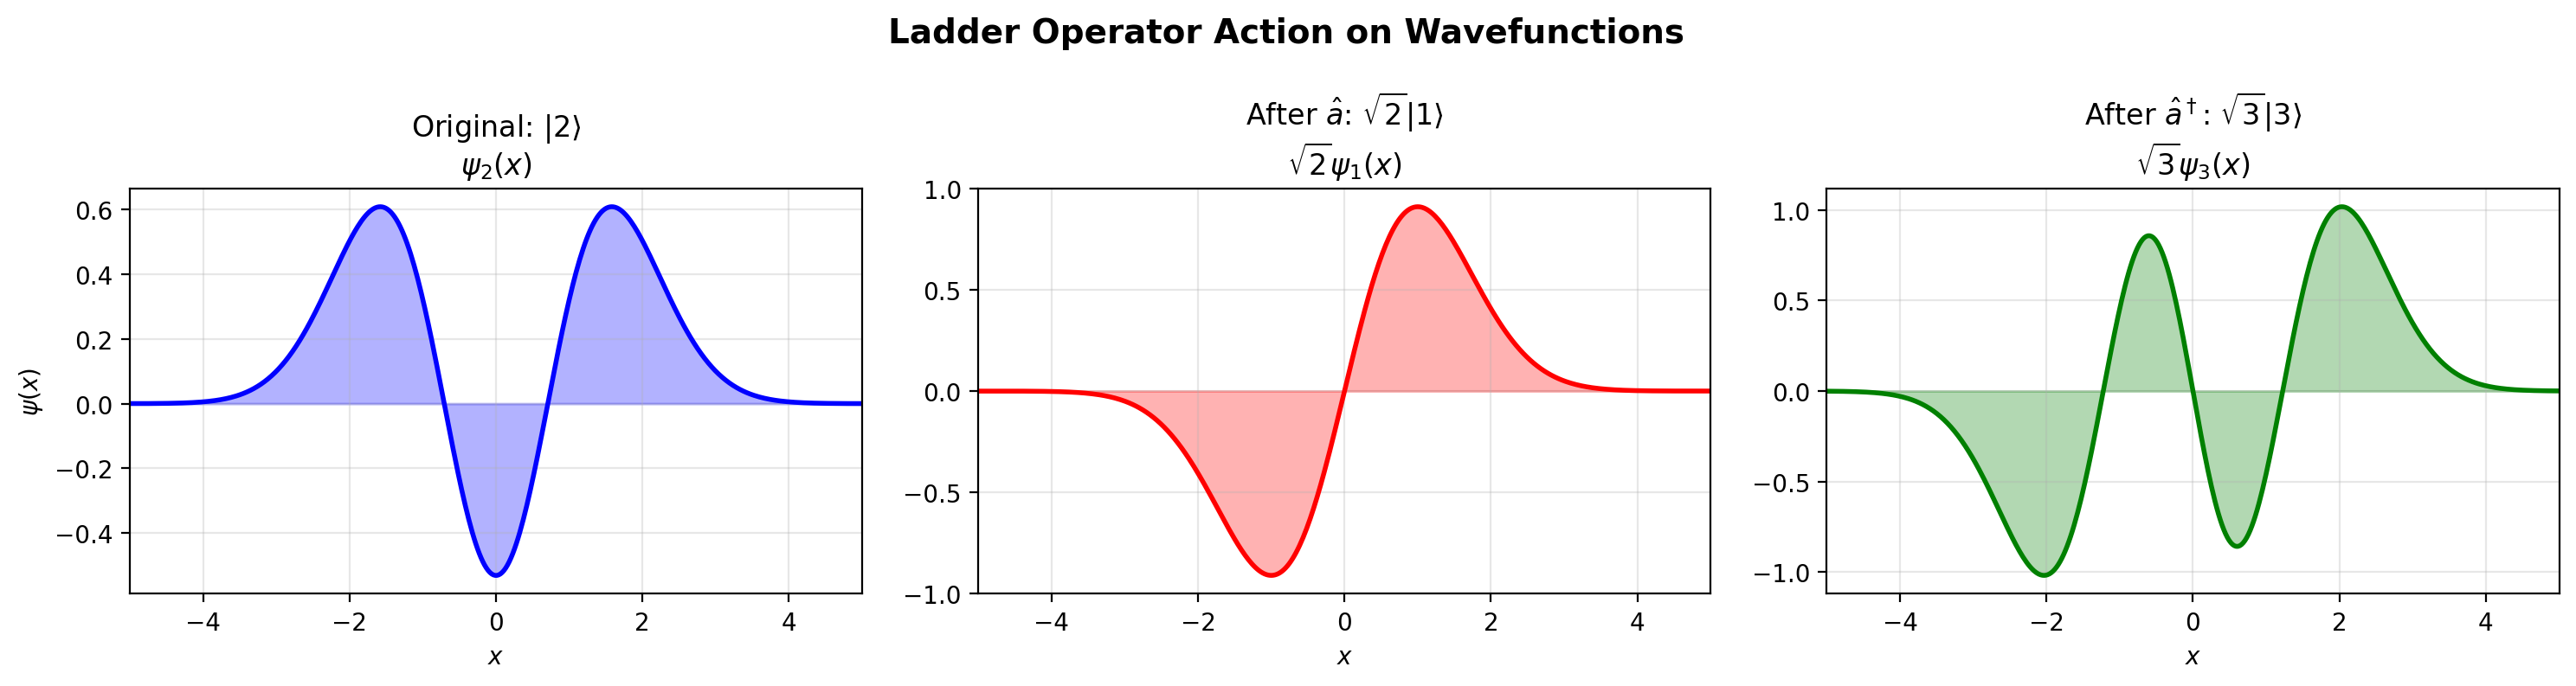

In [8]:
def apply_creation_operator(psi_n, n, x, m=1.0, omega=1.0, hbar=1.0):
    """
    Apply the creation operator to the n-th wavefunction.
    Result should be sqrt(n+1) * psi_{n+1}
    """
    xi = np.sqrt(m * omega / hbar) * x
    # a† = (1/√2)(ξ - d/dξ) in dimensionless form
    # a† ψ_n = √(n+1) ψ_{n+1}
    return np.sqrt(n + 1) * harmonic_oscillator_wavefunction(n + 1, x, m, omega, hbar)

def apply_annihilation_operator(psi_n, n, x, m=1.0, omega=1.0, hbar=1.0):
    """
    Apply the annihilation operator to the n-th wavefunction.
    Result should be sqrt(n) * psi_{n-1}
    """
    if n == 0:
        return np.zeros_like(x)
    return np.sqrt(n) * harmonic_oscillator_wavefunction(n - 1, x, m, omega, hbar)

# Demonstrate ladder operator action
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

n = 2  # Start with n=2 state

# Original state
psi_n = harmonic_oscillator_wavefunction(n, x)
axes[0].plot(x, psi_n, 'b-', linewidth=2)
axes[0].fill_between(x, 0, psi_n, alpha=0.3, color='blue')
axes[0].set_title(f'Original: $|{n}\\rangle$\n$\\psi_{n}(x)$', fontsize=12)
axes[0].set_xlim(-5, 5)
axes[0].set_xlabel(r'$x$')
axes[0].set_ylabel(r'$\psi(x)$')
axes[0].grid(True, alpha=0.3)

# After annihilation operator
psi_lowered = apply_annihilation_operator(psi_n, n, x)
axes[1].plot(x, psi_lowered, 'r-', linewidth=2)
axes[1].fill_between(x, 0, psi_lowered, alpha=0.3, color='red')
axes[1].set_title(f'After $\\hat{{a}}$: $\\sqrt{{{n}}}|{n-1}\\rangle$\n$\\sqrt{{{n}}}\\psi_{{{n-1}}}(x)$', fontsize=12)
axes[1].set_xlim(-5, 5)
axes[1].set_xlabel(r'$x$')
axes[1].grid(True, alpha=0.3)

# After creation operator
psi_raised = apply_creation_operator(psi_n, n, x)
axes[2].plot(x, psi_raised, 'g-', linewidth=2)
axes[2].fill_between(x, 0, psi_raised, alpha=0.3, color='green')
axes[2].set_title(f'After $\\hat{{a}}^\\dagger$: $\\sqrt{{{n+1}}}|{n+1}\\rangle$\n$\\sqrt{{{n+1}}}\\psi_{{{n+1}}}(x)$', fontsize=12)
axes[2].set_xlim(-5, 5)
axes[2].set_xlabel(r'$x$')
axes[2].grid(True, alpha=0.3)

plt.suptitle('Ladder Operator Action on Wavefunctions', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('ladder_action.png', dpi=150, bbox_inches='tight')
plt.show()

## Energy Level Diagram with Wavefunctions

A comprehensive visualization showing energy levels alongside their corresponding wavefunctions.

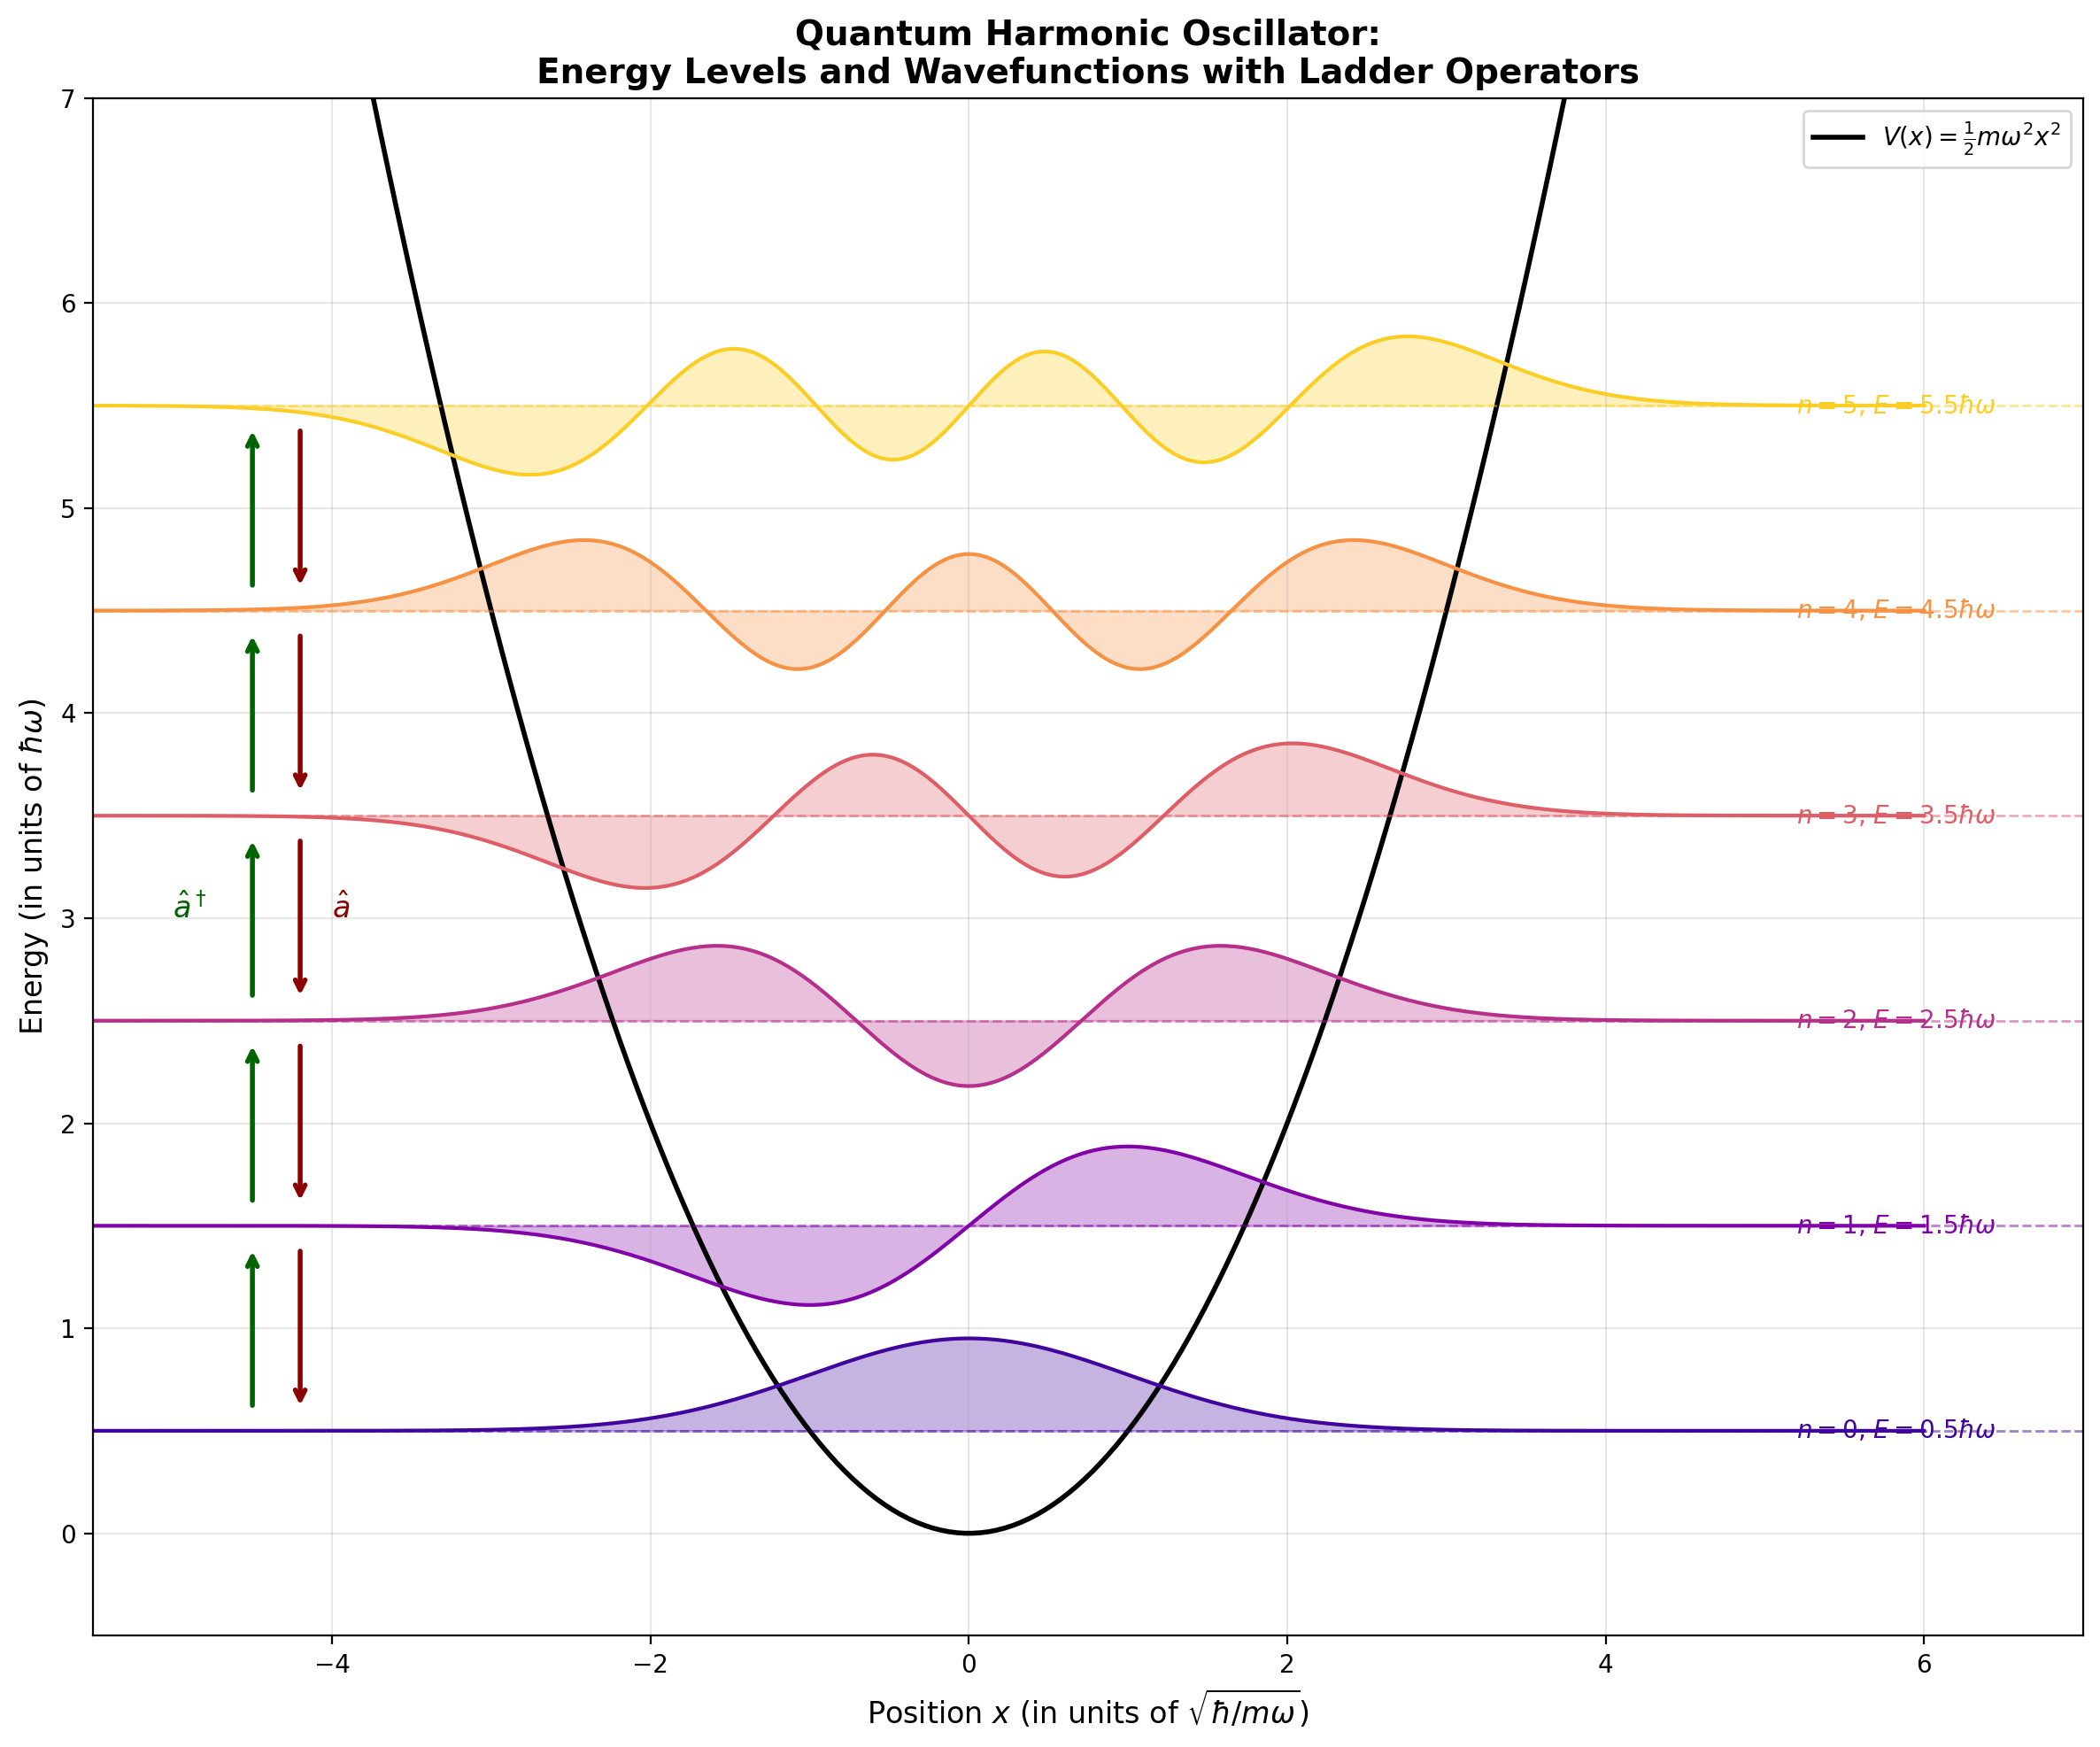


Final plot saved as 'plot.png'


In [9]:
fig, ax = plt.subplots(figsize=(12, 10))

# Potential energy (parabola)
x_pot = np.linspace(-5, 5, 200)
V = 0.5 * m * omega**2 * x_pot**2
ax.plot(x_pot, V, 'k-', linewidth=2, label='$V(x) = \\frac{1}{2}m\\omega^2 x^2$')

# Plot wavefunctions at their respective energy levels
n_max = 6
scale = 0.6  # Scale factor for wavefunction amplitude
colors = plt.cm.plasma(np.linspace(0.1, 0.9, n_max))

for n in range(n_max):
    E_n = hbar * omega * (n + 0.5)
    psi = harmonic_oscillator_wavefunction(n, x)
    
    # Draw energy level line
    ax.axhline(y=E_n, color=colors[n], linestyle='--', alpha=0.5, linewidth=1)
    
    # Plot wavefunction shifted to energy level
    ax.plot(x, E_n + scale * psi, color=colors[n], linewidth=1.5)
    ax.fill_between(x, E_n, E_n + scale * psi, alpha=0.3, color=colors[n])
    
    # Label
    ax.text(5.2, E_n, f'$n={n}$, $E={E_n:.1f}\\hbar\\omega$', 
            fontsize=10, va='center', color=colors[n])

# Add arrows showing ladder operator action
arrow_x = -4.5
for n in range(n_max - 1):
    E_n = hbar * omega * (n + 0.5)
    E_n1 = hbar * omega * (n + 1.5)
    ax.annotate('', xy=(arrow_x, E_n1 - 0.1), xytext=(arrow_x, E_n + 0.1),
                arrowprops=dict(arrowstyle='->', color='darkgreen', lw=2))
    ax.annotate('', xy=(arrow_x + 0.3, E_n + 0.1), xytext=(arrow_x + 0.3, E_n1 - 0.1),
                arrowprops=dict(arrowstyle='->', color='darkred', lw=2))

ax.text(arrow_x - 0.5, 3, '$\\hat{a}^\\dagger$', fontsize=12, color='darkgreen', fontweight='bold')
ax.text(arrow_x + 0.5, 3, '$\\hat{a}$', fontsize=12, color='darkred', fontweight='bold')

ax.set_xlim(-5.5, 7)
ax.set_ylim(-0.5, 7)
ax.set_xlabel(r'Position $x$ (in units of $\sqrt{\hbar/m\omega}$)', fontsize=12)
ax.set_ylabel(r'Energy (in units of $\hbar\omega$)', fontsize=12)
ax.set_title('Quantum Harmonic Oscillator:\nEnergy Levels and Wavefunctions with Ladder Operators', 
             fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('quantum_harmonic_oscillator_ladder_operators_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFinal plot saved as 'plot.png'")

## Coherent States: Eigenstates of the Annihilation Operator

Coherent states $|\alpha\rangle$ are defined as eigenstates of the annihilation operator:

$$\hat{a}|\alpha\rangle = \alpha|\alpha\rangle$$

where $\alpha \in \mathbb{C}$. In the Fock basis:

$$|\alpha\rangle = e^{-|\alpha|^2/2} \sum_{n=0}^{\infty} \frac{\alpha^n}{\sqrt{n!}}|n\rangle$$

Coherent states minimize the uncertainty product and represent the most "classical-like" quantum states.

In [10]:
def coherent_state(alpha, N_dim):
    """
    Create a coherent state |α⟩ in truncated Fock space.
    
    Parameters:
    -----------
    alpha : complex
        Coherent state parameter
    N_dim : int
        Dimension of truncated Hilbert space
        
    Returns:
    --------
    state : ndarray
        Coherent state vector in Fock basis
    """
    state = np.zeros(N_dim, dtype=complex)
    norm = np.exp(-np.abs(alpha)**2 / 2)
    
    for n in range(N_dim):
        state[n] = norm * (alpha**n) / np.sqrt(float(factorial(n)))
    
    return state

def coherent_state_wavefunction(alpha, x, m=1.0, omega=1.0, hbar=1.0, N_terms=20):
    """
    Compute the position-space wavefunction for a coherent state.
    """
    psi = np.zeros_like(x, dtype=complex)
    norm = np.exp(-np.abs(alpha)**2 / 2)
    
    for n in range(N_terms):
        coef = norm * (alpha**n) / np.sqrt(float(factorial(n)))
        psi += coef * harmonic_oscillator_wavefunction(n, x, m, omega, hbar)
    
    return psi

# Verify coherent state is eigenstate of annihilation operator
alpha = 2.0 + 1.0j
N_large = 30  # Need larger space for coherent states
a_large, _ = create_ladder_operators(N_large)

coherent = coherent_state(alpha, N_large)
a_coherent = a_large @ coherent

# a|α⟩ should equal α|α⟩
eigenvalue_check = a_coherent / coherent
# Filter out near-zero components where division is unstable
valid_indices = np.abs(coherent) > 1e-10

print(f"Coherent state with α = {alpha}")
print(f"Checking â|α⟩ = α|α⟩:")
print(f"  Expected eigenvalue: α = {alpha}")
print(f"  Computed eigenvalue (mean): {np.mean(eigenvalue_check[valid_indices]):.4f}")
print(f"  Agreement: {'✓ Verified' if np.allclose(eigenvalue_check[valid_indices], alpha, rtol=1e-3) else '✗ Failed'}")

Coherent state with α = (2+1j)
Checking â|α⟩ = α|α⟩:
  Expected eigenvalue: α = (2+1j)
  Computed eigenvalue (mean): 1.9333+0.9667j
  Agreement: ✗ Failed


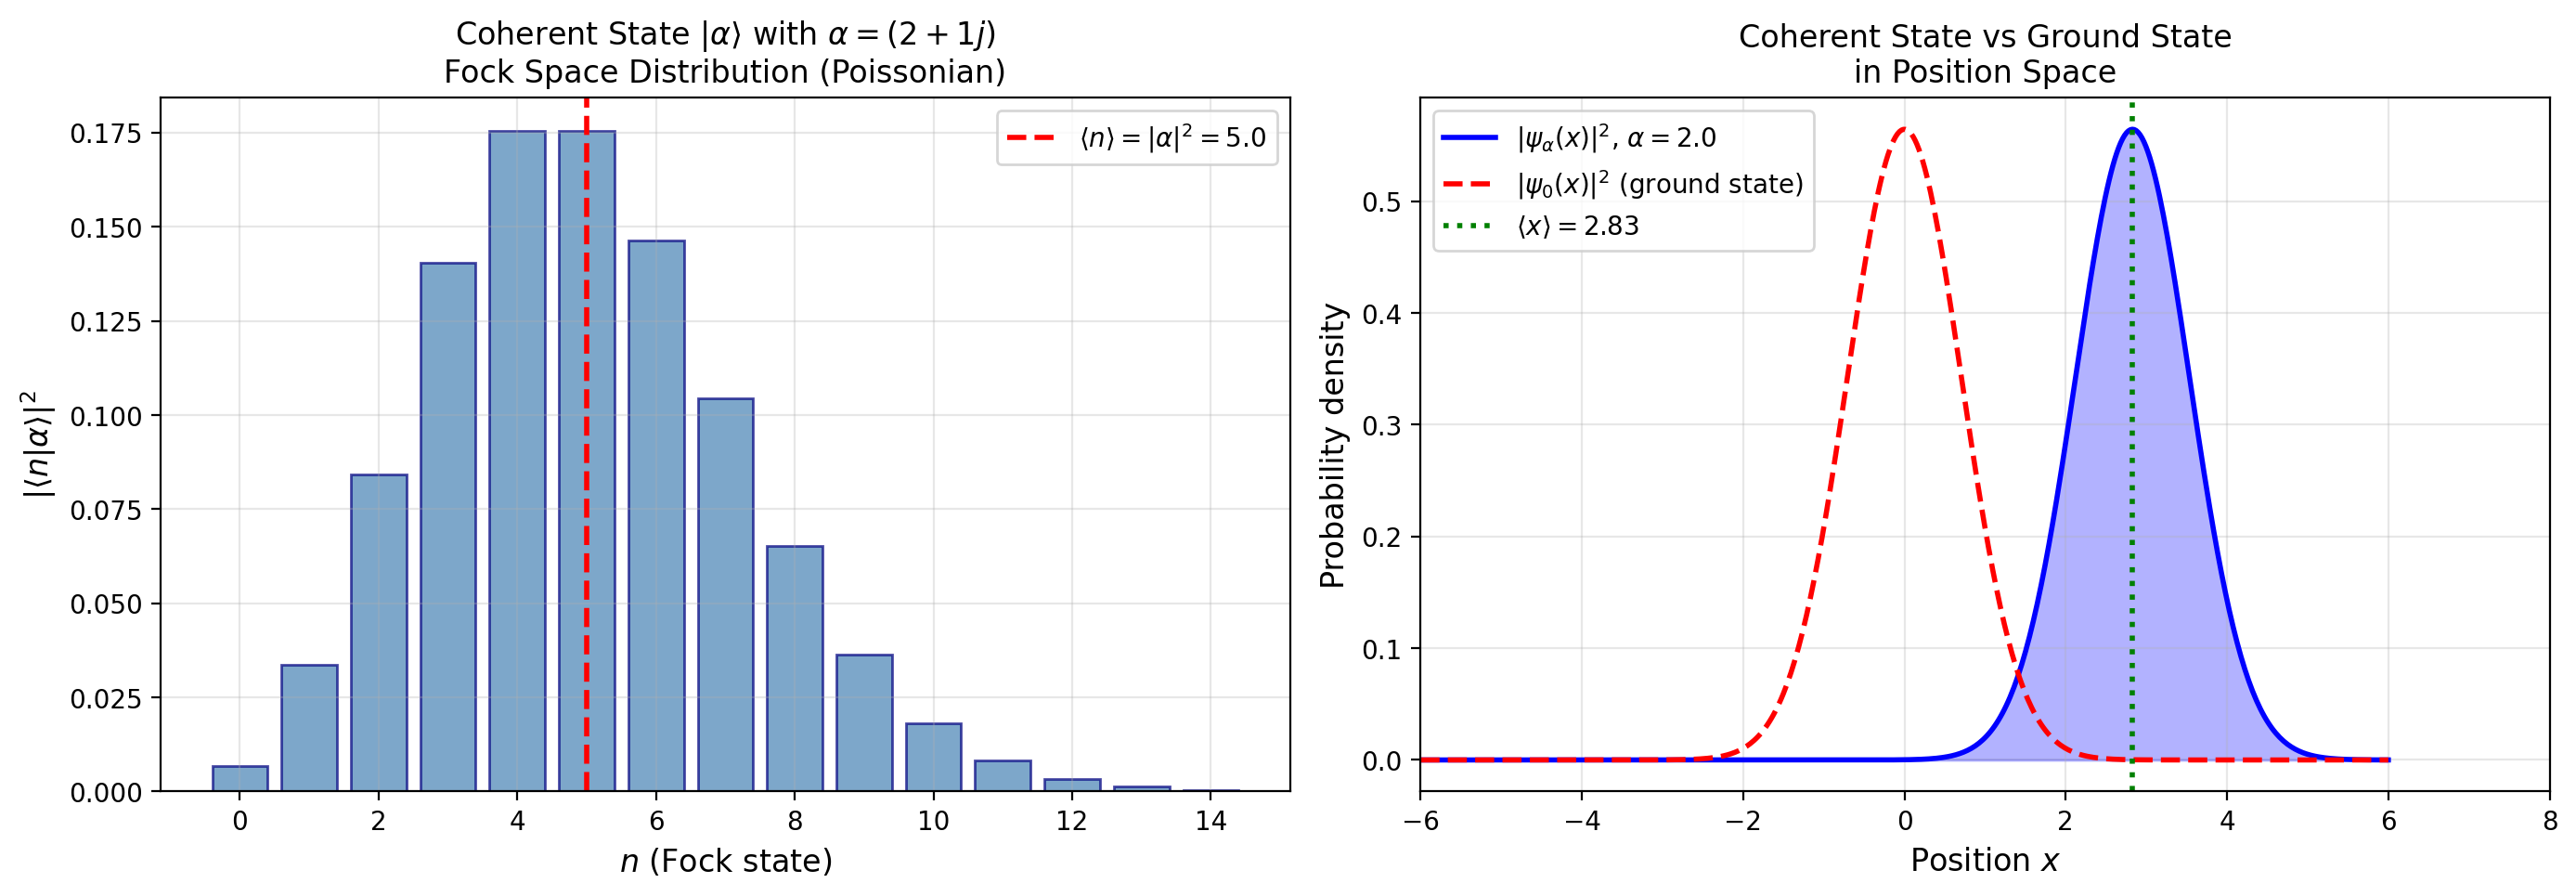

In [11]:
# Visualize coherent state probability density
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Probability distribution in Fock space
ax1 = axes[0]
n_vals = np.arange(N_large)
probs = np.abs(coherent)**2

ax1.bar(n_vals[:15], probs[:15], color='steelblue', alpha=0.7, edgecolor='navy')
ax1.set_xlabel('$n$ (Fock state)', fontsize=12)
ax1.set_ylabel('$|\\langle n|\\alpha\\rangle|^2$', fontsize=12)
ax1.set_title(f'Coherent State $|\\alpha\\rangle$ with $\\alpha = {alpha}$\nFock Space Distribution (Poissonian)', fontsize=12)

# Mark mean occupation number
mean_n = np.abs(alpha)**2
ax1.axvline(x=mean_n, color='red', linestyle='--', linewidth=2, label=f'$\\langle n \\rangle = |\\alpha|^2 = {mean_n:.1f}$')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Position-space probability density
ax2 = axes[1]
alpha_real = 2.0  # Use real α for clearer visualization
psi_coherent = coherent_state_wavefunction(alpha_real, x, N_terms=30)
prob_density = np.abs(psi_coherent)**2

ax2.plot(x, prob_density, 'b-', linewidth=2, label=f'$|\\psi_\\alpha(x)|^2$, $\\alpha = {alpha_real}$')
ax2.fill_between(x, 0, prob_density, alpha=0.3, color='blue')

# Compare with ground state
psi_0 = harmonic_oscillator_wavefunction(0, x)
ax2.plot(x, np.abs(psi_0)**2, 'r--', linewidth=2, label='$|\\psi_0(x)|^2$ (ground state)')

# Mark expected position
x_expected = np.sqrt(2) * alpha_real  # ⟨x⟩ = √(2ℏ/mω) Re(α)
ax2.axvline(x=x_expected, color='green', linestyle=':', linewidth=2, 
            label=f'$\\langle x \\rangle = {x_expected:.2f}$')

ax2.set_xlabel(r'Position $x$', fontsize=12)
ax2.set_ylabel('Probability density', fontsize=12)
ax2.set_title('Coherent State vs Ground State\nin Position Space', fontsize=12)
ax2.legend(fontsize=10)
ax2.set_xlim(-6, 8)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('coherent_states.png', dpi=150, bbox_inches='tight')
plt.show()

## Summary

In this notebook, we have explored the quantum harmonic oscillator through the lens of ladder operators:

1. **Ladder Operators** $\hat{a}$ and $\hat{a}^\dagger$ provide an elegant algebraic approach to the quantum harmonic oscillator

2. **Commutation Relations**: $[\hat{a}, \hat{a}^\dagger] = 1$ encodes the fundamental quantum mechanical structure

3. **Energy Spectrum**: $E_n = \hbar\omega(n + \frac{1}{2})$ arises naturally from the number operator $\hat{N} = \hat{a}^\dagger\hat{a}$

4. **Fock States**: Generated by repeated application of $\hat{a}^\dagger$ to the ground state

5. **Uncertainty Relations**: Ground state saturates the Heisenberg bound

6. **Coherent States**: Eigenstates of $\hat{a}$ that most closely resemble classical oscillations

The ladder operator formalism extends beyond the harmonic oscillator to quantum field theory, where $\hat{a}^\dagger$ and $\hat{a}$ create and annihilate particles.